In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import random
random.seed(1100038344)
import survivalstan
import numpy as np
import pandas as pd
from stancache import stancache
from matplotlib import pyplot as plt

INFO:stancache.seed:Setting seed to 1245502385


In [2]:
df = pd.read_csv('/home/carlos/R-Factory/BayesianSurv/glioblastome2013.csv', )
df.head()

,Unnamed: 0,index,X2012_METHYLATION_CLASS,AGE,DFS_MONTHS,DFS_STATUS,EXPRESSION_SUBTYPE,G.CIMP_METHYLATION,IDH1_STATUS,MGMT_STATUS,OS_MONTHS,OS_STATUS,SEX,THERAPY_CLASS
0,1,TCGA.06.5410.01,CL_1,72.3,3.5,DiseaseFree,Mesenchymal,non-G-CIMP,WT,METHYLATED,3.5,DECEASED,Female,Unspecified Radiation
1,2,TCGA.14.0781.01,CL_1,49.0,1.0,DiseaseFree,Mesenchymal,non-G-CIMP,WT,UNMETHYLATED,1.0,DECEASED,Male,Unspecified Radiation
2,3,TCGA.14.0867.01,CL_3,67.9,2.0,DiseaseFree,Mesenchymal,non-G-CIMP,WT,METHYLATED,2.0,DECEASED,Male,Unspecified Radiation
3,4,TCGA.06.0402.01,NaN,71.3,0.3,DiseaseFree,Classical,non-G-CIMP,NaN,NaN,0.3,DECEASED,Male,Unspecified Radiation
4,5,TCGA.06.6700.01,NaN,76.2,4.8,DiseaseFree,NaN,non-G-CIMP,WT,NaN,4.8,LIVING,Male,"TMZ Chemoradiation, TMZ Chemo"


In [3]:
df.index


RangeIndex(start=0, stop=50, step=1)

In [4]:
df['OS_STATUS'] = (df['OS_STATUS'] == 'DECEASED')

In [5]:
df.head()

,Unnamed: 0,index,X2012_METHYLATION_CLASS,AGE,DFS_MONTHS,DFS_STATUS,EXPRESSION_SUBTYPE,G.CIMP_METHYLATION,IDH1_STATUS,MGMT_STATUS,OS_MONTHS,OS_STATUS,SEX,THERAPY_CLASS
0,1,TCGA.06.5410.01,CL_1,72.3,3.5,DiseaseFree,Mesenchymal,non-G-CIMP,WT,METHYLATED,3.5,True,Female,Unspecified Radiation
1,2,TCGA.14.0781.01,CL_1,49.0,1.0,DiseaseFree,Mesenchymal,non-G-CIMP,WT,UNMETHYLATED,1.0,True,Male,Unspecified Radiation
2,3,TCGA.14.0867.01,CL_3,67.9,2.0,DiseaseFree,Mesenchymal,non-G-CIMP,WT,METHYLATED,2.0,True,Male,Unspecified Radiation
3,4,TCGA.06.0402.01,NaN,71.3,0.3,DiseaseFree,Classical,non-G-CIMP,NaN,NaN,0.3,True,Male,Unspecified Radiation
4,5,TCGA.06.6700.01,NaN,76.2,4.8,DiseaseFree,NaN,non-G-CIMP,WT,NaN,4.8,False,Male,"TMZ Chemoradiation, TMZ Chemo"


In [6]:
import survivalstan

In [15]:
fit1 = survivalstan.fit_stan_survival_model(
    df=df,
    time_col='OS_MONTHS',
    event_col='OS_STATUS',
    model_code=survivalstan.models.exp_survival_model,
    formula='~ AGE + EXPRESSION_SUBTYPE',
    model_cohort = 'exp model'
)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f77411c14d5fdde0f8f2d85efd32dc56 NOW.


NOT reusing model.
Ran in 90.843 sec.


In [16]:
survivalstan.utils.filter_stan_summary([fit1], pars=['lp__','beta'])


,mean,se_mean,sd,2.5%,50%,97.5%,Rhat
lp__,-154.008947,0.130957,3.226442,-161.395369,-153.642560,-148.882918,1.003236
beta[0],-0.183620,0.014241,0.417880,-1.467240,-0.024851,0.196290,1.005842
beta[1],0.076371,0.004831,0.193102,-0.201668,0.017256,0.594340,1.001307
beta[2],-0.002875,0.005168,0.174259,-0.377112,-0.000811,0.368326,0.999695
beta[3],0.062917,0.005506,0.216018,-0.283843,0.008891,0.694948,1.003438
beta[4],0.018637,0.000412,0.011847,-0.004581,0.018774,0.041942,1.004173


In [19]:
fit2 = survivalstan.fit_stan_survival_model(
    df=df,
    time_col='OS_MONTHS',
    event_col='OS_STATUS',
    model_code=survivalstan.models.exp_survival_model,
    formula='~ AGE + EXPRESSION_SUBTYPE',
    iter = 5000,
    chains = 4,
    model_cohort = 'exp model, more iter'
)

Reusing model.
Ran in 95.766 sec.


In [20]:
survivalstan.utils.filter_stan_summary([fit2], pars=['lp__','beta'])


,mean,se_mean,sd,2.5%,50%,97.5%,Rhat
lp__,-153.788843,0.160465,3.304185,-161.257217,-153.516175,-147.695433,1.009176
beta[0],-0.164909,0.010601,0.373759,-1.230005,-0.026021,0.228242,1.002549
beta[1],0.082215,0.004048,0.200628,-0.181003,0.019866,0.680038,1.000320
beta[2],-0.001865,0.004061,0.166193,-0.385991,-0.001451,0.387318,1.001801
beta[3],0.060677,0.013643,0.241366,-0.360425,0.006930,0.776026,1.013073
beta[4],0.019286,0.000318,0.011677,-0.002939,0.019380,0.041882,1.004052


In [15]:
df['age_centered'] = df.AGE-df.AGE.mean()
df.head()
df = df.rename(columns = {'Unnamed: 0' : 'sample'})

In [16]:
dlong = stancache.cached(
    survivalstan.prep_data_long_surv,
    df=df, event_col='OS_STATUS', time_col='OS_MONTHS'
)

INFO:stancache.stancache:prep_data_long_surv: cache_filename set to prep_data_long_surv.cached.df_48564847543.event_col_OS_STATUS.time_col_OS_MONTHS.pkl
INFO:stancache.stancache:prep_data_long_surv: Starting execution
INFO:stancache.stancache:prep_data_long_surv: Execution completed (0:00:00.170377 elapsed)
INFO:stancache.stancache:prep_data_long_surv: Saving results to cache


In [17]:
dlong.head()


,sample,index,X2012_METHYLATION_CLASS,AGE,DFS_MONTHS,DFS_STATUS,EXPRESSION_SUBTYPE,G.CIMP_METHYLATION,IDH1_STATUS,MGMT_STATUS,OS_MONTHS,OS_STATUS,SEX,THERAPY_CLASS,age_centered,key,end_time,end_failure
0,1,TCGA.06.5410.01,CL_1,72.3,3.5,DiseaseFree,Mesenchymal,non-G-CIMP,WT,METHYLATED,3.5,True,Female,Unspecified Radiation,14.38,1,3.5,True
1,1,TCGA.06.5410.01,CL_1,72.3,3.5,DiseaseFree,Mesenchymal,non-G-CIMP,WT,METHYLATED,3.5,True,Female,Unspecified Radiation,14.38,1,1.0,False
2,1,TCGA.06.5410.01,CL_1,72.3,3.5,DiseaseFree,Mesenchymal,non-G-CIMP,WT,METHYLATED,3.5,True,Female,Unspecified Radiation,14.38,1,2.0,False
3,1,TCGA.06.5410.01,CL_1,72.3,3.5,DiseaseFree,Mesenchymal,non-G-CIMP,WT,METHYLATED,3.5,True,Female,Unspecified Radiation,14.38,1,0.3,False
6,1,TCGA.06.5410.01,CL_1,72.3,3.5,DiseaseFree,Mesenchymal,non-G-CIMP,WT,METHYLATED,3.5,True,Female,Unspecified Radiation,14.38,1,3.2,False


In [18]:
df = df.rename(columns = {'sample' : 'index'})

In [19]:
testfit = survivalstan.fit_stan_survival_model(
    model_cohort = 'test model',
    model_code = survivalstan.models.pem_survival_model,
    df = dlong,
    sample_col = 'index',
    timepoint_end_col = 'end_time',
    event_col = 'end_failure',
    formula = '~ age_centered + SEX',
    iter = 5000,
    chains = 4,
    seed = 9001,
    FIT_FUN = stancache.cached_stan_fit,
    )

INFO:stancache.stancache:Step 1: Get compiled model code, possibly from cache
INFO:stancache.stancache:StanModel: cache_filename set to anon_model.cython_0_26_1.model_code_5118842489520038317.pystan_2_17_0_0.stanmodel.pkl
INFO:stancache.stancache:StanModel: Loading result from cache
INFO:stancache.stancache:Step 2: Get posterior draws from model, possibly from cache
INFO:stancache.stancache:sampling: cache_filename set to anon_model.cython_0_26_1.model_code_5118842489520038317.pystan_2_17_0_0.stanfit.chains_4.data_90464894945.iter_5000.seed_9001.pkl
INFO:stancache.stancache:sampling: Starting execution
INFO:stancache.stancache:sampling: Execution completed (0:28:40.608342 elapsed)
INFO:stancache.stancache:sampling: Saving results to cache
/home/carlos/anaconda3/lib/python3.6/site-packages/stancache/stancache.py:285: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must

In [20]:
survivalstan.utils.print_stan_summary([testfit], pars='lp__')


          mean   se_mean         sd        2.5%        50%      97.5%      Rhat
lp__ -82.81044  9.108335  49.888404 -156.070032 -89.527335  39.123374  1.133123


In [21]:
survivalstan.utils.print_stan_summary([testfit], pars='log_baseline_raw')


                          mean   se_mean        sd      2.5%       50%     97.5%      Rhat
log_baseline_raw[0]  -0.001692  0.001893  0.189264 -0.404380 -0.000075  0.413943  1.002505
log_baseline_raw[1]   0.034417  0.004980  0.198633 -0.336619  0.010372  0.547604  1.002680
log_baseline_raw[2]  -0.006832  0.001838  0.183814 -0.437254 -0.000511  0.379111  1.000471
log_baseline_raw[3]   0.064088  0.008762  0.218879 -0.251928  0.014753  0.683474  1.008043
log_baseline_raw[4]   0.020155  0.001857  0.185736 -0.331790  0.004186  0.461147  1.000818
log_baseline_raw[5]   0.010475  0.001875  0.187499 -0.387155  0.002837  0.437652  1.000194
log_baseline_raw[6]   0.005230  0.001856  0.185613 -0.380516  0.000249  0.419889  1.003027
log_baseline_raw[7]  -0.002180  0.001810  0.180962 -0.406178 -0.000299  0.396054  0.999908
log_baseline_raw[8]  -0.004695  0.001782  0.178217 -0.430590 -0.000659  0.361438  0.999977
log_baseline_raw[9]  -0.002433  0.001738  0.173831 -0.376566 -0.001968  0.386687  1.001532

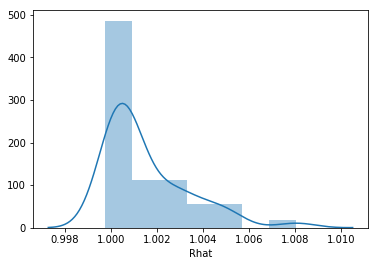

In [22]:
survivalstan.utils.plot_stan_summary([testfit], pars='log_baseline_raw')


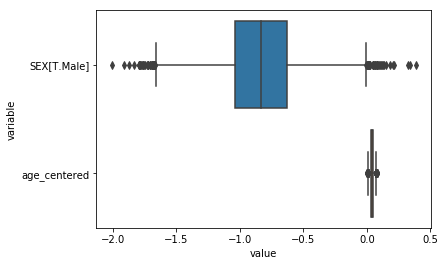

In [23]:
survivalstan.utils.plot_coefs([testfit])


In [25]:
ppsurv = survivalstan.utils.prep_pp_survival_data([testfit], by='SEX')


In [ ]:
ppsurvrv.head()

NameError: name 'ppsurv' is not defined

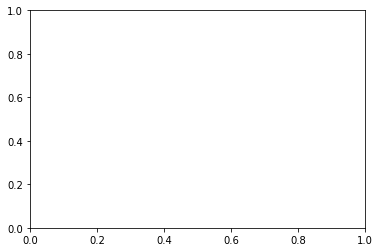

In [24]:
subplot = plt.subplots(1, 1)
survivalstan.utils._plot_pp_survival_data(ppsurv.query('SEX == "Male"').copy(),
                                          subplot=subplot, color='blue', alpha=0.5)
survivalstan.utils._plot_pp_survival_data(ppsurv.query('SEX == "Female"').copy(),
                                          subplot=subplot, color='red', alpha=0.5)
survivalstan.utils.plot_observed_survival(df=d[d['SEX']=='Female'], event_col='event', time_col='t',
                                          color='red', label='Female')
survivalstan.utils.plot_observed_survival(df=d[d['SEX']=='male'], event_col='event', time_col='t',
                                          color='blue', label='male')
plt.legend()